<a href="https://colab.research.google.com/github/flyrey3/codemy-pytorch-/blob/main/codemy(pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import torch
import torch.nn as nn
import torch.nn.functional as func
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [188]:
class Model(nn.Module):
  def __init__(self, input_features=4, h1=8, h2=9, output_features=3):
    super().__init__()
    self.layer1 = nn.Linear(input_features, h1)
    self.layer2 = nn.Linear(h1, h2)
    self.output = nn.Linear(h2, output_features)

  def forward(self, x):
    x = func.relu(self.layer1(x))
    x = func.relu(self.layer2(x))
    x = self.output(x)

    return x


In [189]:
model = Model()
torch.manual_seed(45)

url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
dataframe = pd.read_csv(url)
dataframe['variety'] = dataframe['variety'].replace('Setosa', 0.0)
dataframe['variety'] = dataframe['variety'].replace('Versicolor', 1.0)
dataframe['variety'] = dataframe['variety'].replace('Virginica', 0.0)


In [190]:
X = dataframe.drop('variety', axis=1)
y = dataframe['variety']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [191]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [194]:
times = 125
losses = []

for iter in range(times):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if iter % 10 == 0:
    print(f"{iter} & {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


0 & 0.05226467549800873
10 & 0.05102791264653206
20 & 0.04990024492144585
30 & 0.048919789493083954
40 & 0.04804626852273941
50 & 0.04726850986480713
60 & 0.04656525328755379
70 & 0.046262893825769424
80 & 0.04542040079832077
90 & 0.04507523775100708
100 & 0.044693637639284134
110 & 0.0443030521273613
120 & 0.043942056596279144


Text(0.5, 0, 'Iteration')

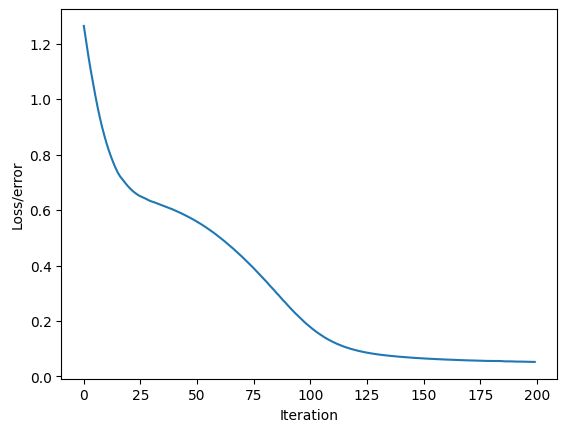

In [193]:
plt.plot(range(times), losses)
plt.ylabel('Loss/error')
plt.xlabel('Iteration')